# Importing neccessary dependencies

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from fashion_net import FashionNet
from train import train

# Preparing working environment

In [2]:
torch.cuda.set_device(0)
device = torch.device("cuda")

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(device=None)

'NVIDIA GeForce RTX 3060 Laptop GPU'

# Load Fashion MNIST dataset

In [5]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [6]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [7]:
images, labels = next(iter(trainloader))

In [8]:
images[0:1].size()

torch.Size([1, 1, 28, 28])

In [9]:
images

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.3412, 0.1529, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [10]:
labels

tensor([4, 6, 5, 6, 2, 5, 4, 4, 3, 6, 5, 2, 4, 1, 5, 5, 6, 1, 0, 9, 8, 7, 6, 1,
        2, 5, 4, 0, 7, 6, 1, 1])

## Visualizing one batch from training data

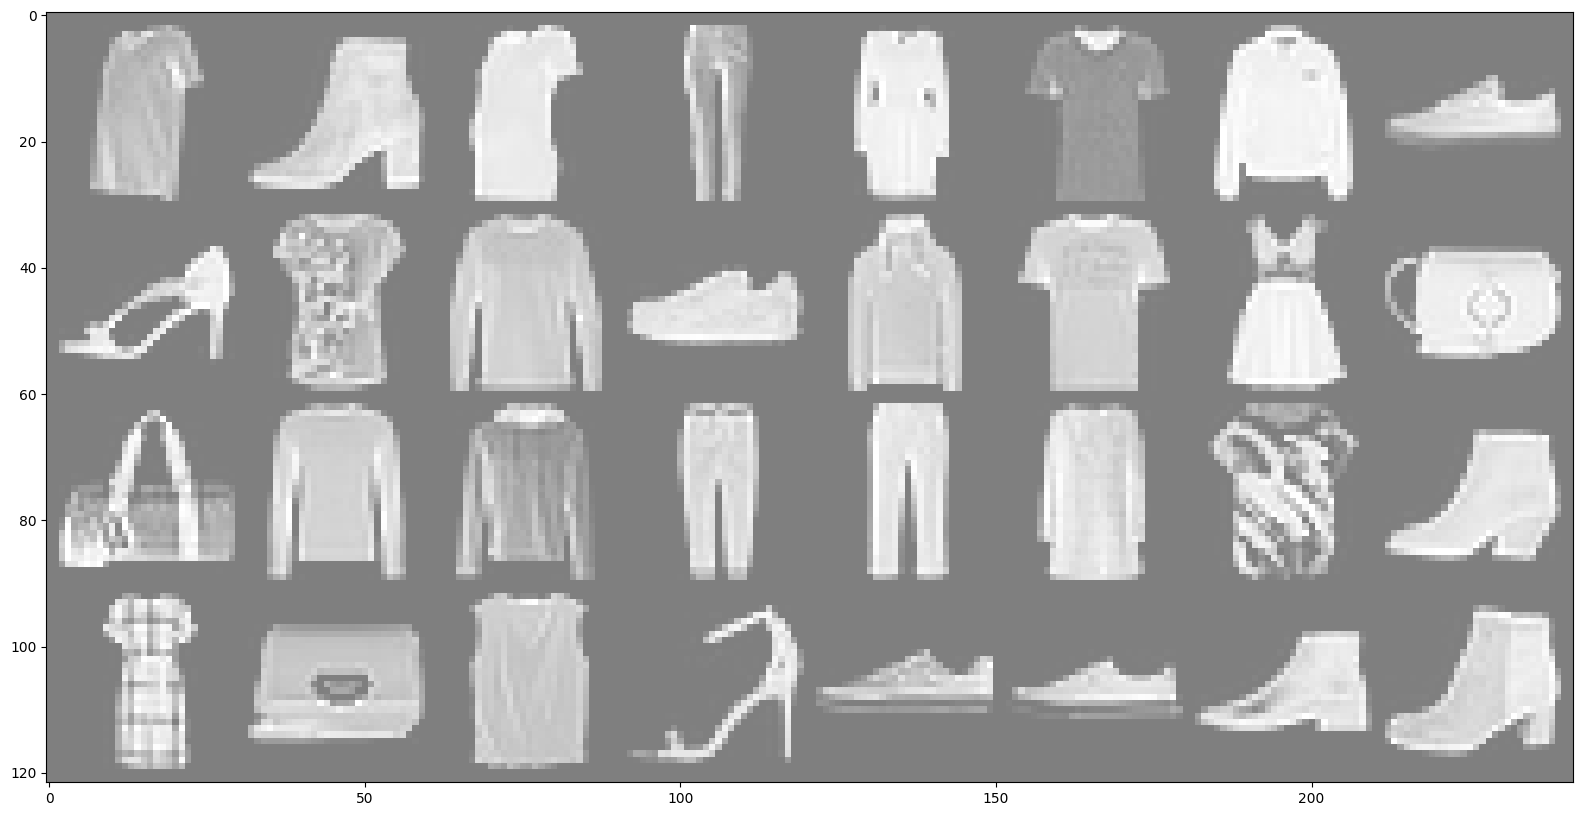

T-shirt/top Ankle boot T-shirt/top Trouser Dress T-shirt/top  Coat Sneaker Sandal T-shirt/top Pullover Sneaker Pullover T-shirt/top Dress   Bag   Bag Pullover Pullover Trouser Trouser  Coat Shirt Ankle boot Dress   Bag Shirt Sandal Sneaker Sneaker Ankle boot Ankle boot


In [11]:
plt.figure(figsize = (20,10))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
images, labels = next(iter(trainloader))

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Training

In [12]:
net = FashionNet().to(device)
net

FashionNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
train(net, optimizer, criterion, trainloader, 5, device)

[1/5] loss: 0.401
[2/5] loss: 0.278
[3/5] loss: 0.244
[4/5] loss: 0.222
[5/5] loss: 0.205
Finished Training


# Getting predictions for one batch

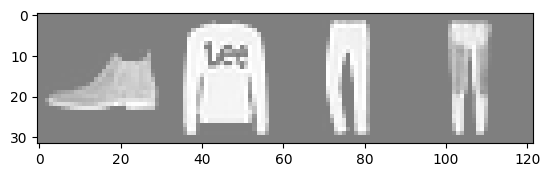

GroundTruth:  Ankle boot Pullover Trouser Trouser


In [14]:
images, labels = next(iter(testloader))
images = images[:4]

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
outputs = net(images.to(device))
print(outputs)

tensor([[ -6.5449,  -8.6385,  -9.8792,  -8.5351,  -8.4780,   1.2978,  -4.9063,
           0.9260,  -8.4626,   6.2790],
        [ -3.9304, -12.9693,   9.1361,  -9.2605,   2.6430, -13.4006,  -1.3271,
         -18.9963,  -6.7881, -17.7891],
        [ -5.3481,  16.4062,  -9.3789,  -2.7513, -11.8395, -13.8822,  -5.1191,
         -22.4329, -12.0968, -26.2156],
        [ -3.5649,  13.0553,  -7.4197,  -2.1311,  -7.4202, -14.0901,  -4.1045,
         -18.8195,  -9.2085, -20.8412]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Ankle boot Pullover Trouser Trouser


# Calculating accuracy

In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        # calculate outputs by running images through the network
        outputs = net(images).cpu()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %


In [19]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        outputs = net(images).cpu()
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

Accuracy for class T-shirt/top is: 91.0 %
Accuracy for class Trouser is: 97.5 %
Accuracy for class Pullover is: 87.3 %
Accuracy for class Dress is: 92.5 %
Accuracy for class Coat  is: 80.3 %
Accuracy for class Sandal is: 98.3 %
Accuracy for class Shirt is: 62.8 %
Accuracy for class Sneaker is: 95.1 %
Accuracy for class Bag   is: 96.7 %
Accuracy for class Ankle boot is: 92.3 %
